<ipython-input-8-84008e30e6bd>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Diagnosis'], palette='coolwarm')


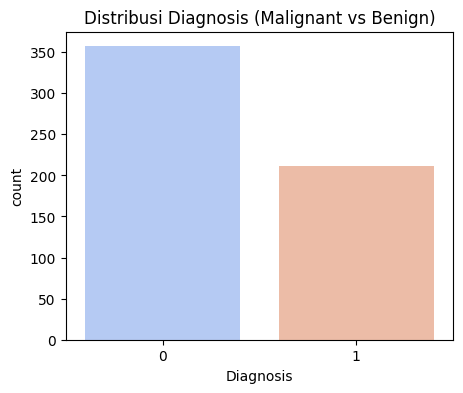

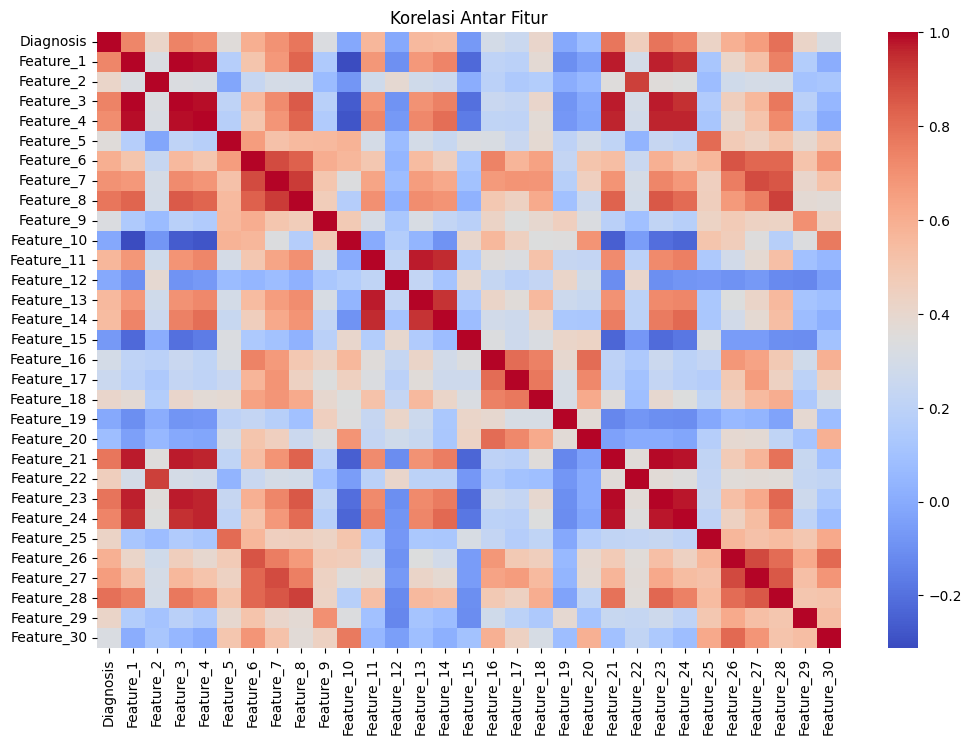

Akurasi Model: 0.96


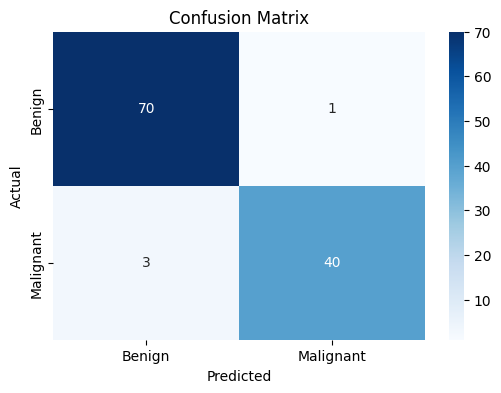

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



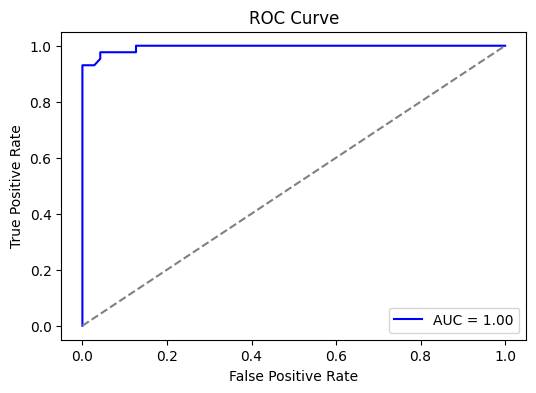

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

# Load dataset
file_path = 'wdbc.data'
df = pd.read_csv(file_path, header=None, delimiter=",")

# Assign column names
columns = ["ID", "Diagnosis"] + [f"Feature_{i}" for i in range(1, 31)]
df.columns = columns

# Drop ID karena tidak relevan
df.drop(columns=["ID"], inplace=True)

# Encode Diagnosis (M = 1, B = 0)
df['Diagnosis'] = df['Diagnosis'].map({'M': 1, 'B': 0})

# Visualisasi Distribusi Diagnosis
plt.figure(figsize=(5, 4))
sns.countplot(x=df['Diagnosis'], palette='coolwarm')
plt.title('Distribusi Diagnosis (Malignant vs Benign)')
plt.show()

# Korelasi Antar Fitur
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title('Korelasi Antar Fitur')
plt.show()

# Split data untuk training dan testing
X = df.drop(columns=['Diagnosis'])
y = df['Diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Buat model Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Prediksi
y_pred = model.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi Model: {accuracy:.2f}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))

# ROC Curve & AUC Score
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
